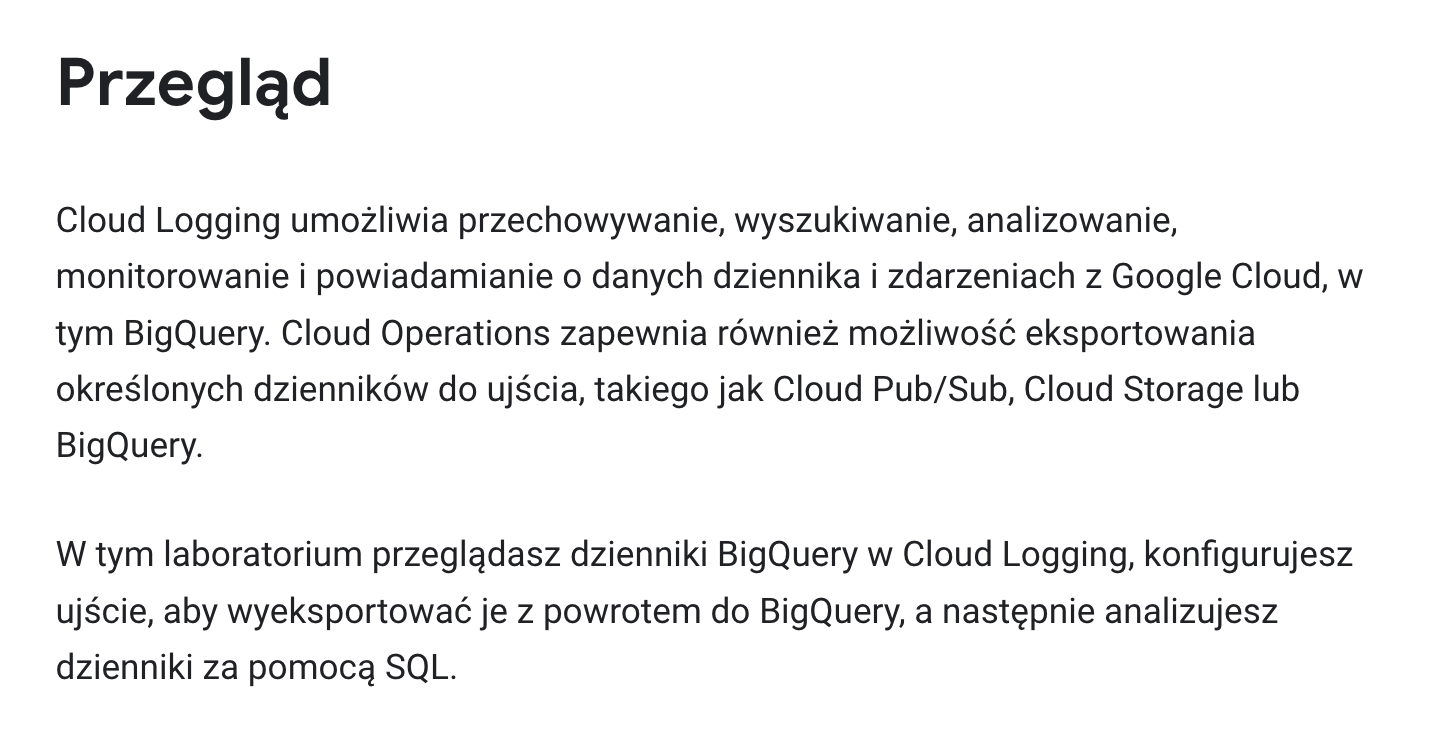

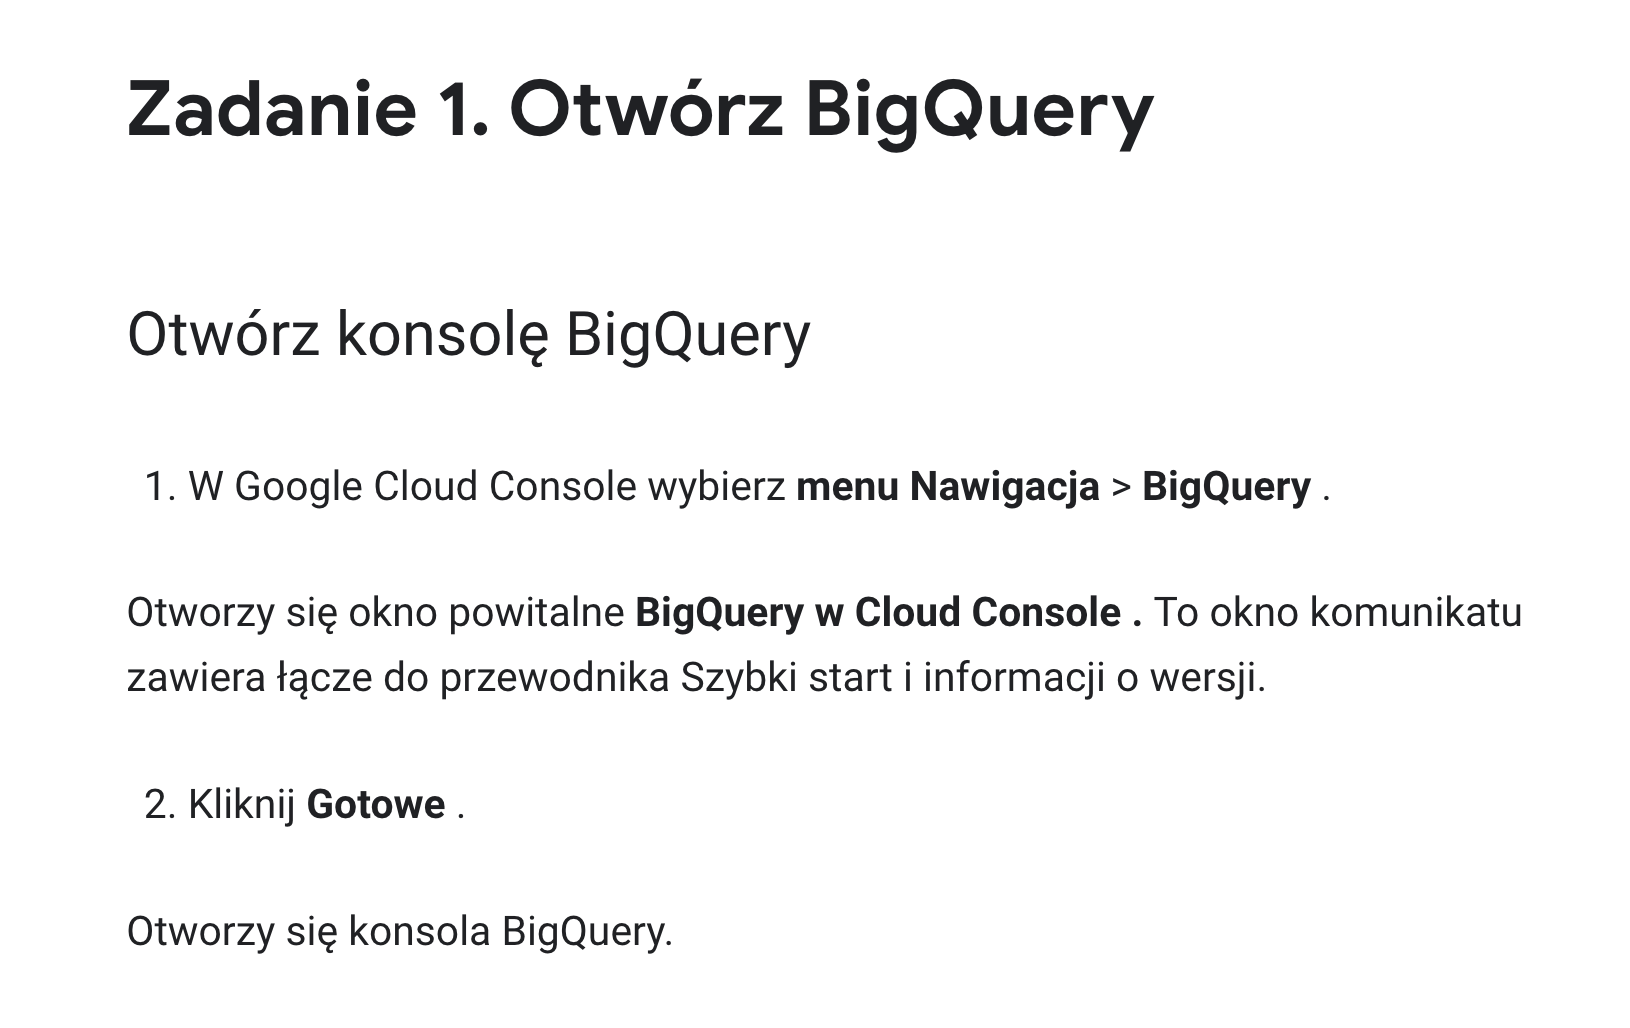

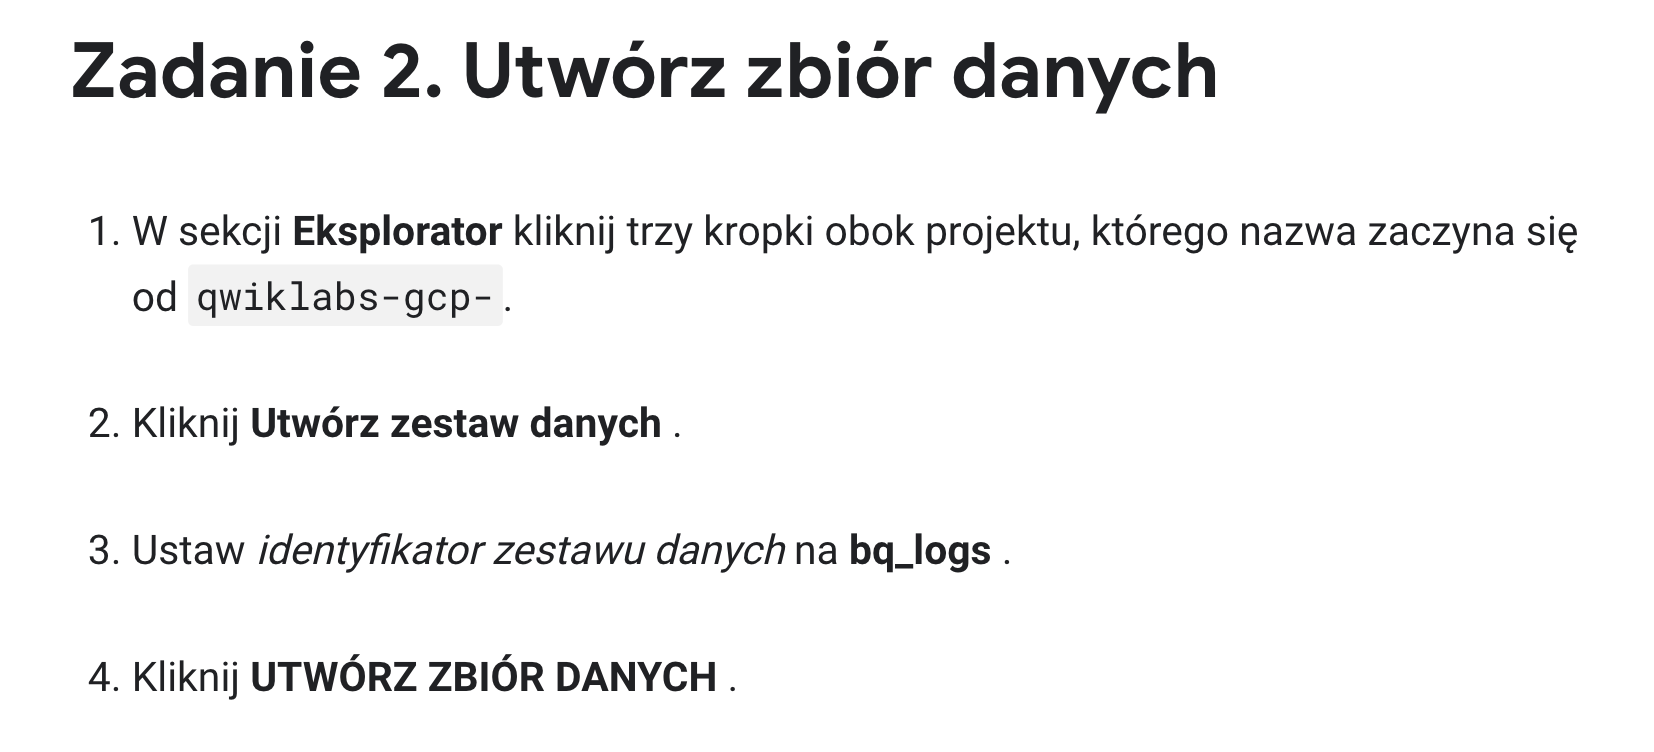

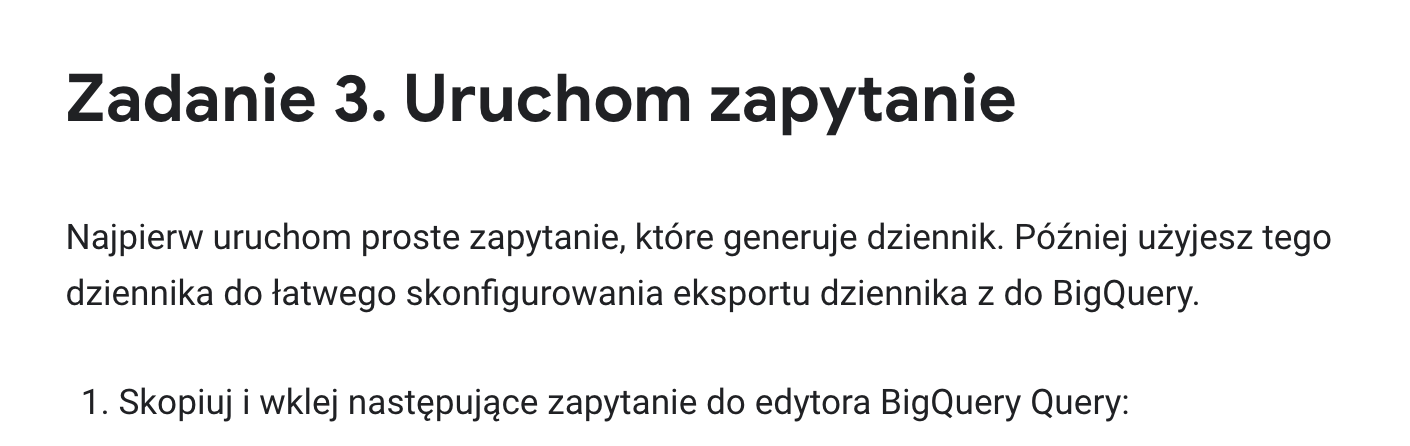

In [ ]:
%%bigquery

SELECT current_date

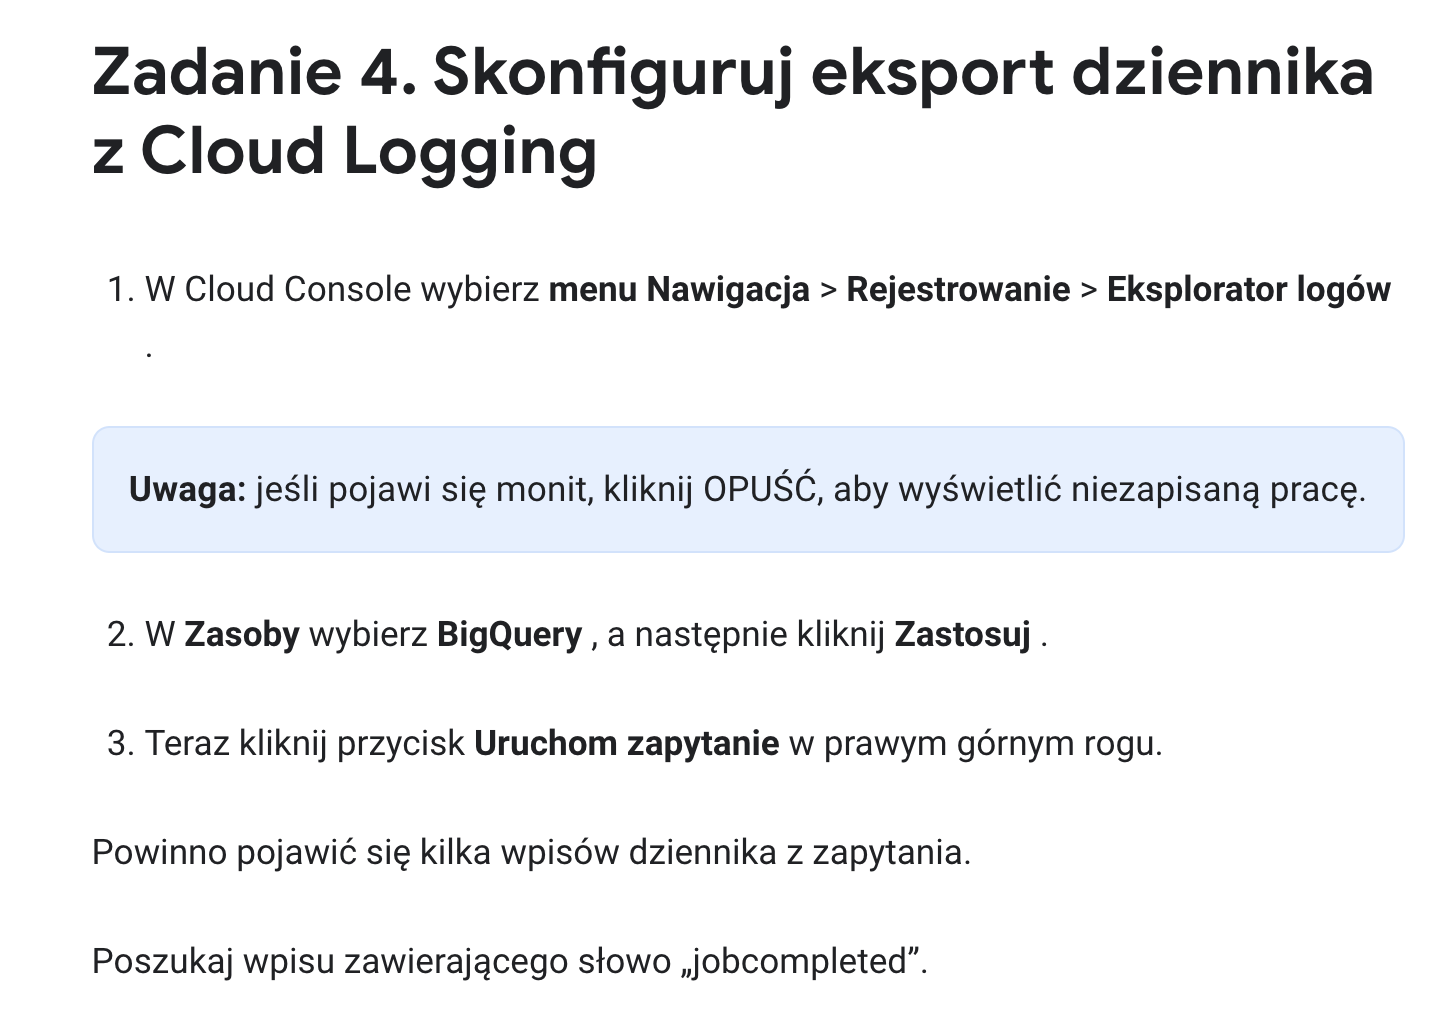

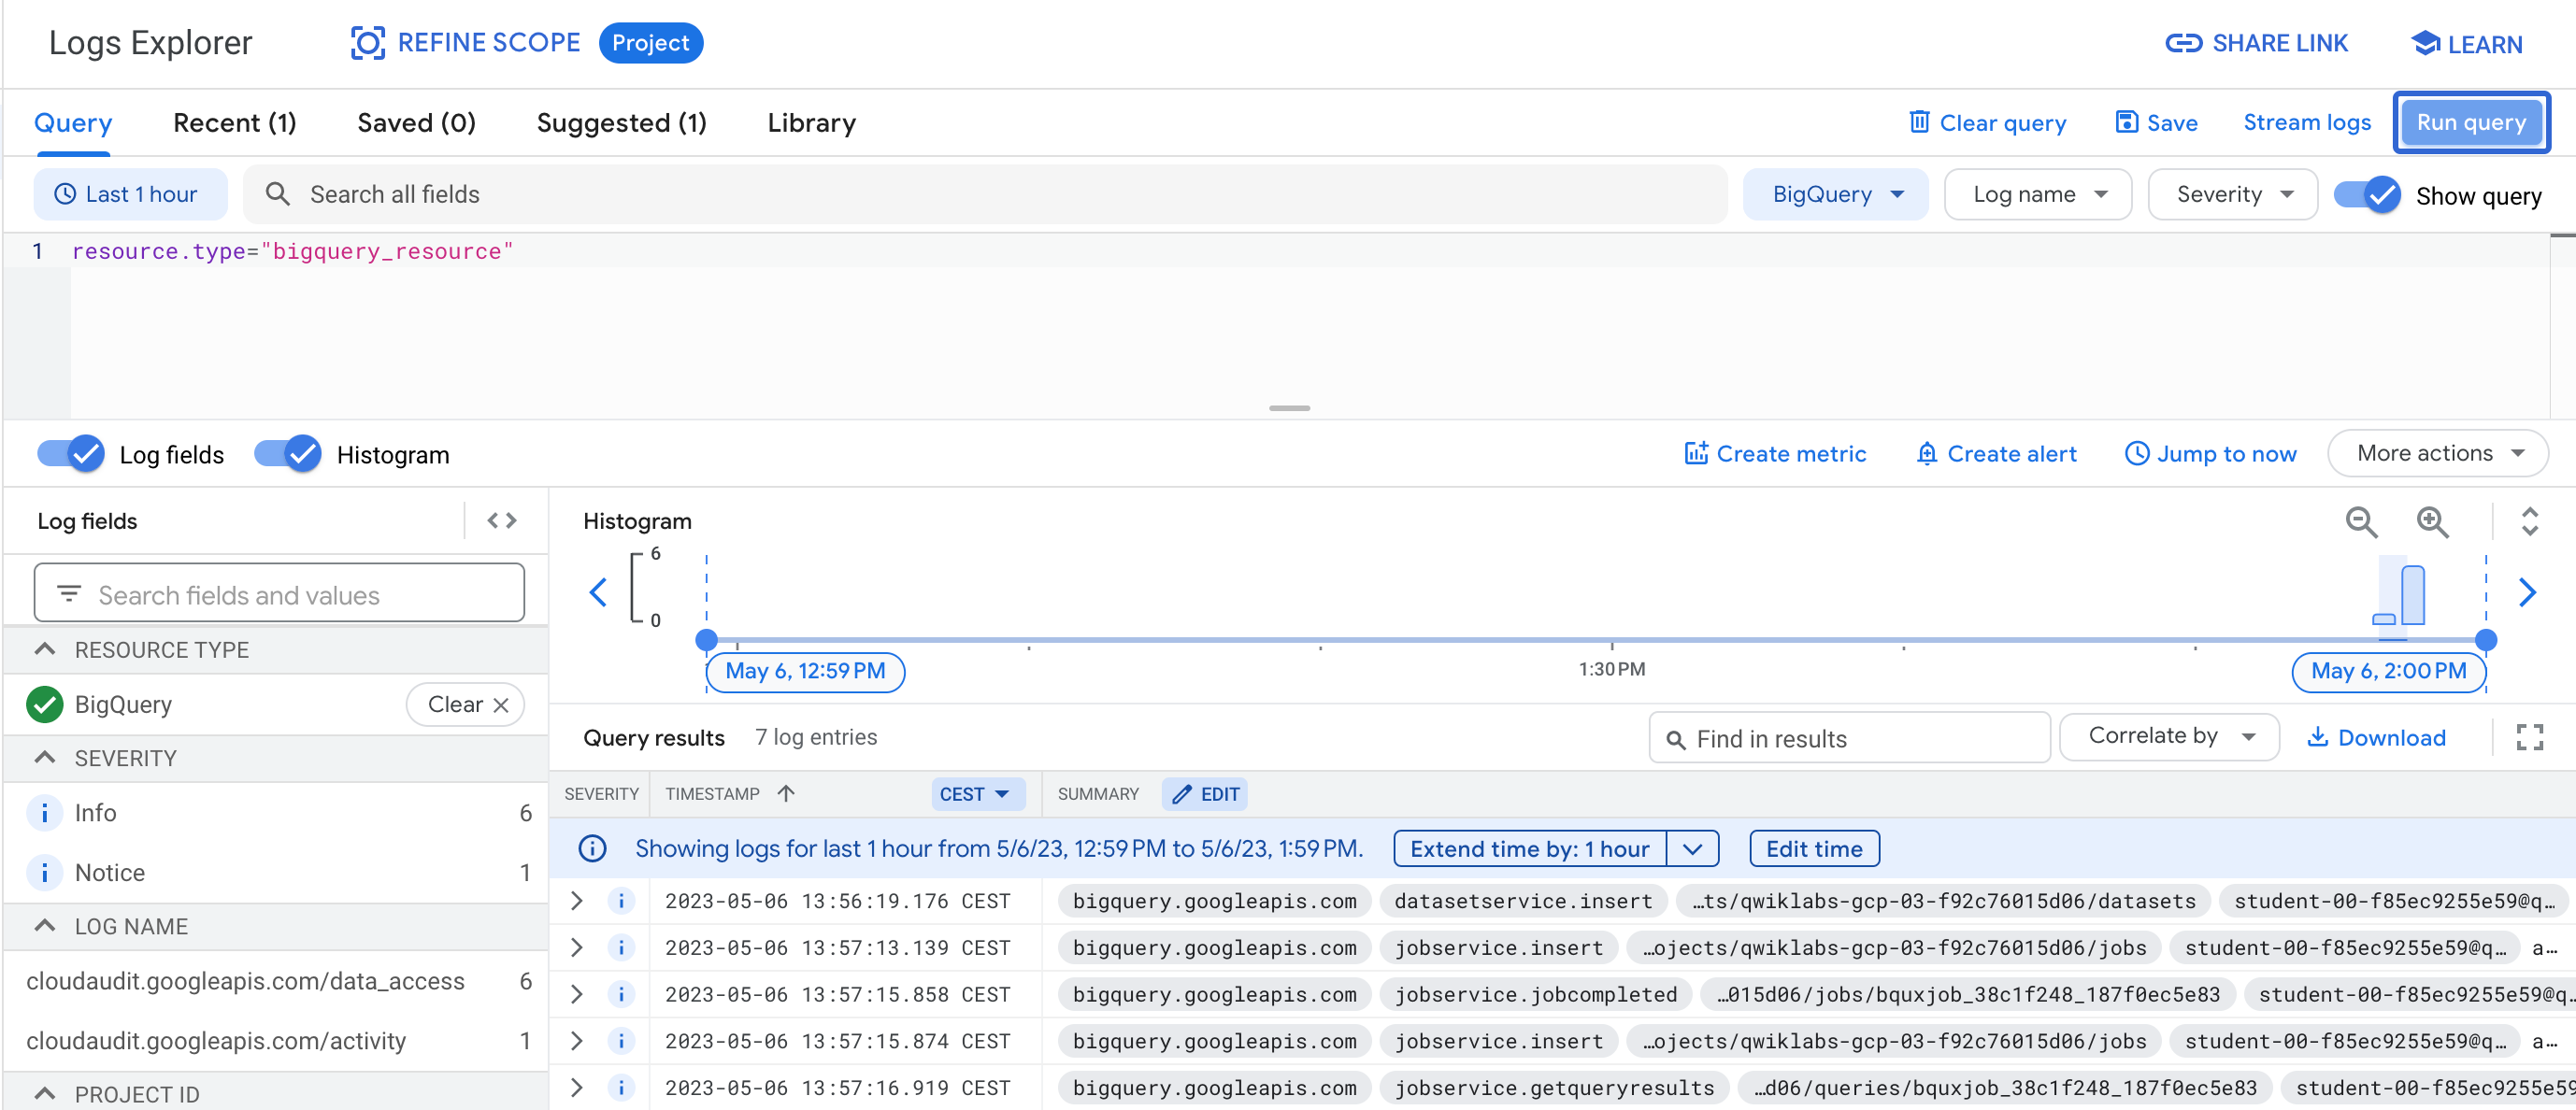

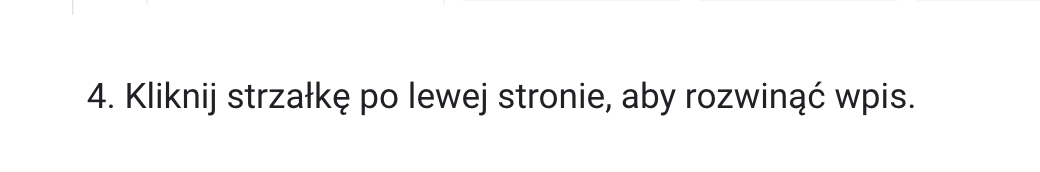

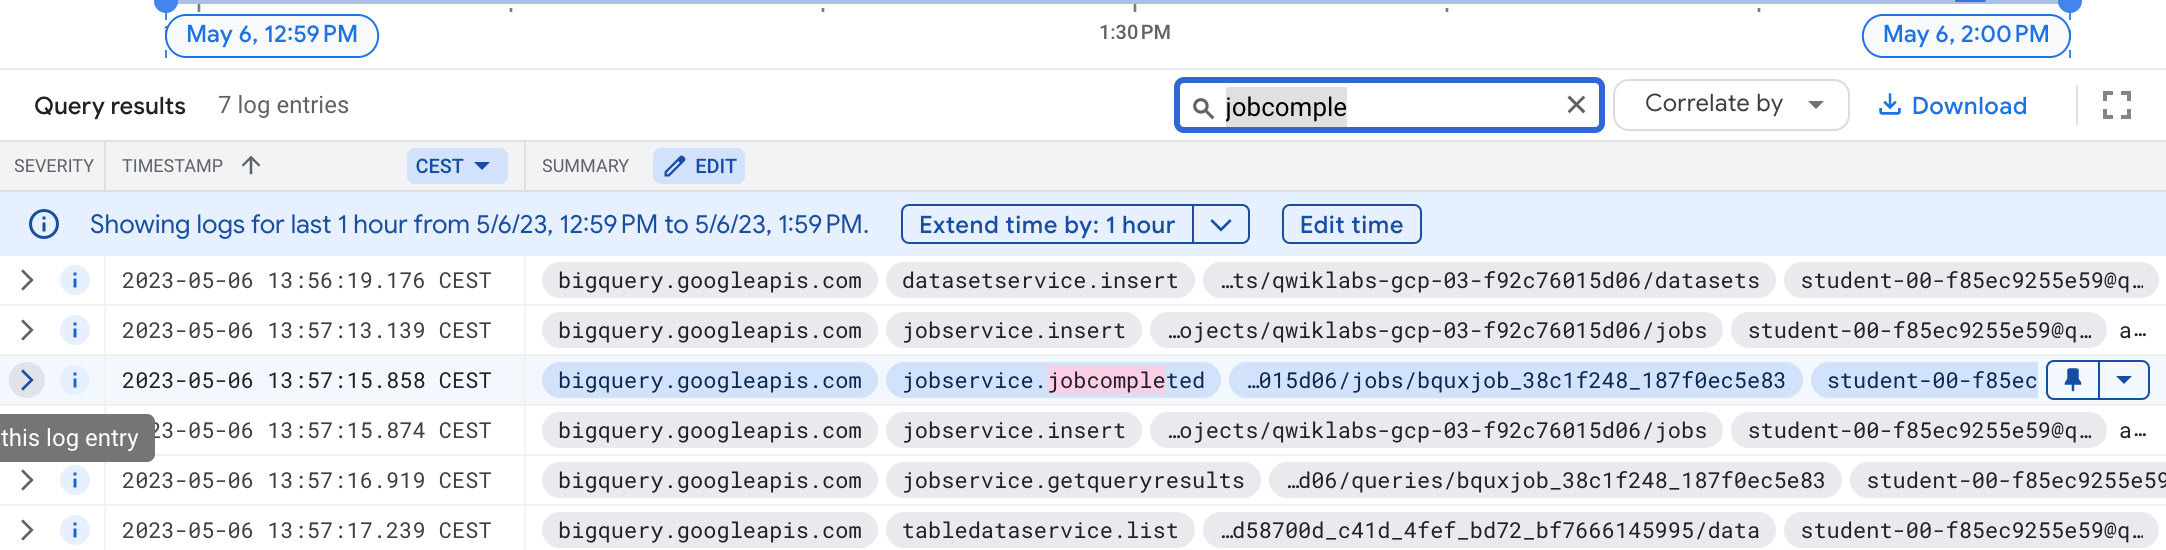

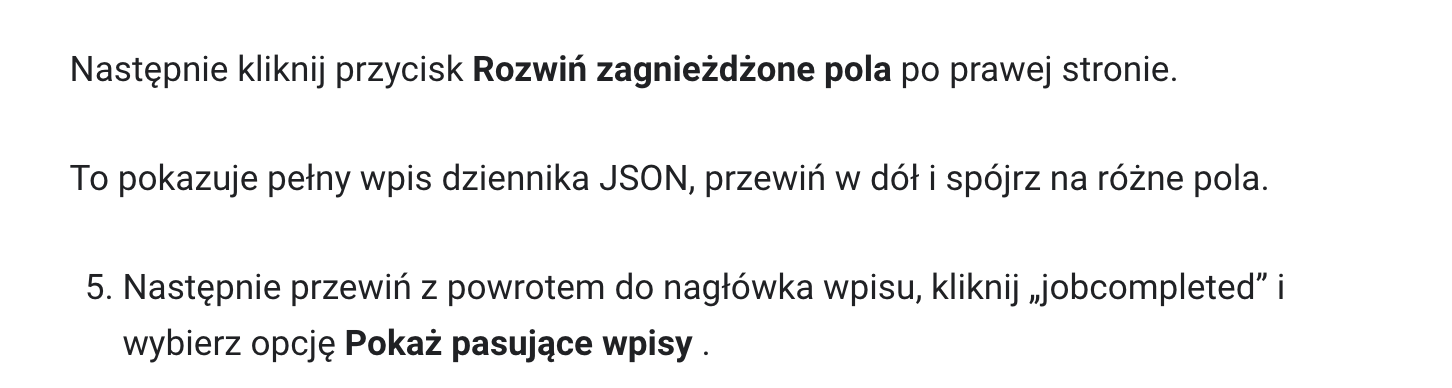

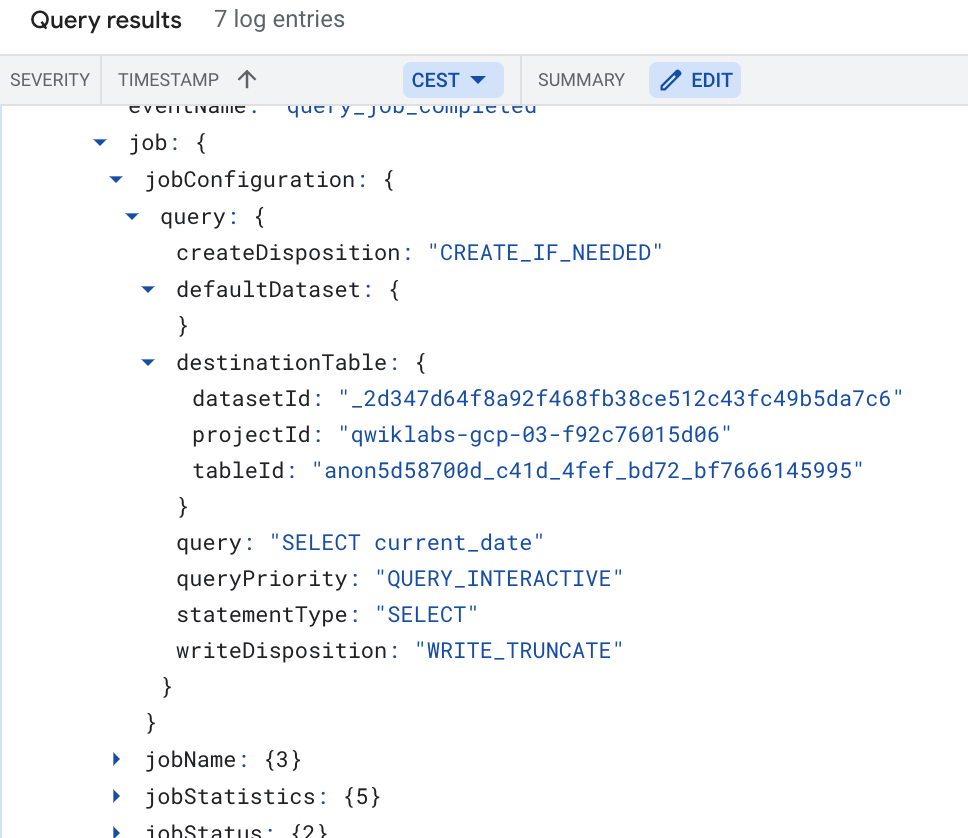

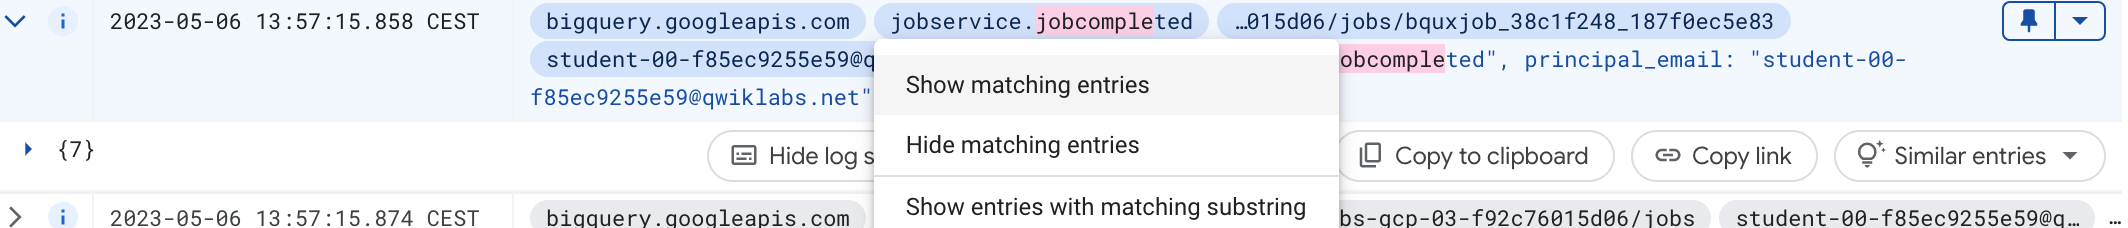

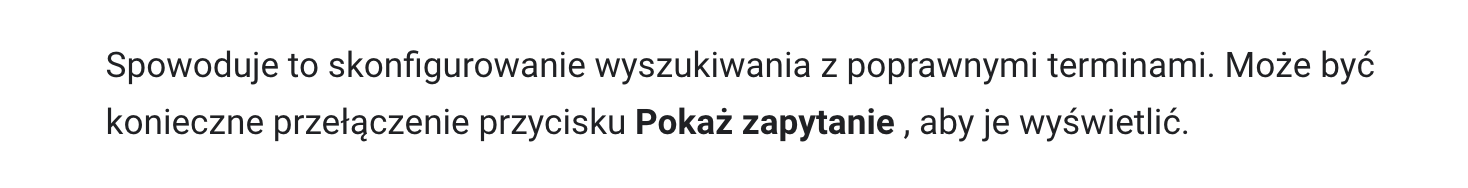

In [ ]:
resource.type="bigquery_resource"
protoPayload.methodName="jobservice.jobcompleted"

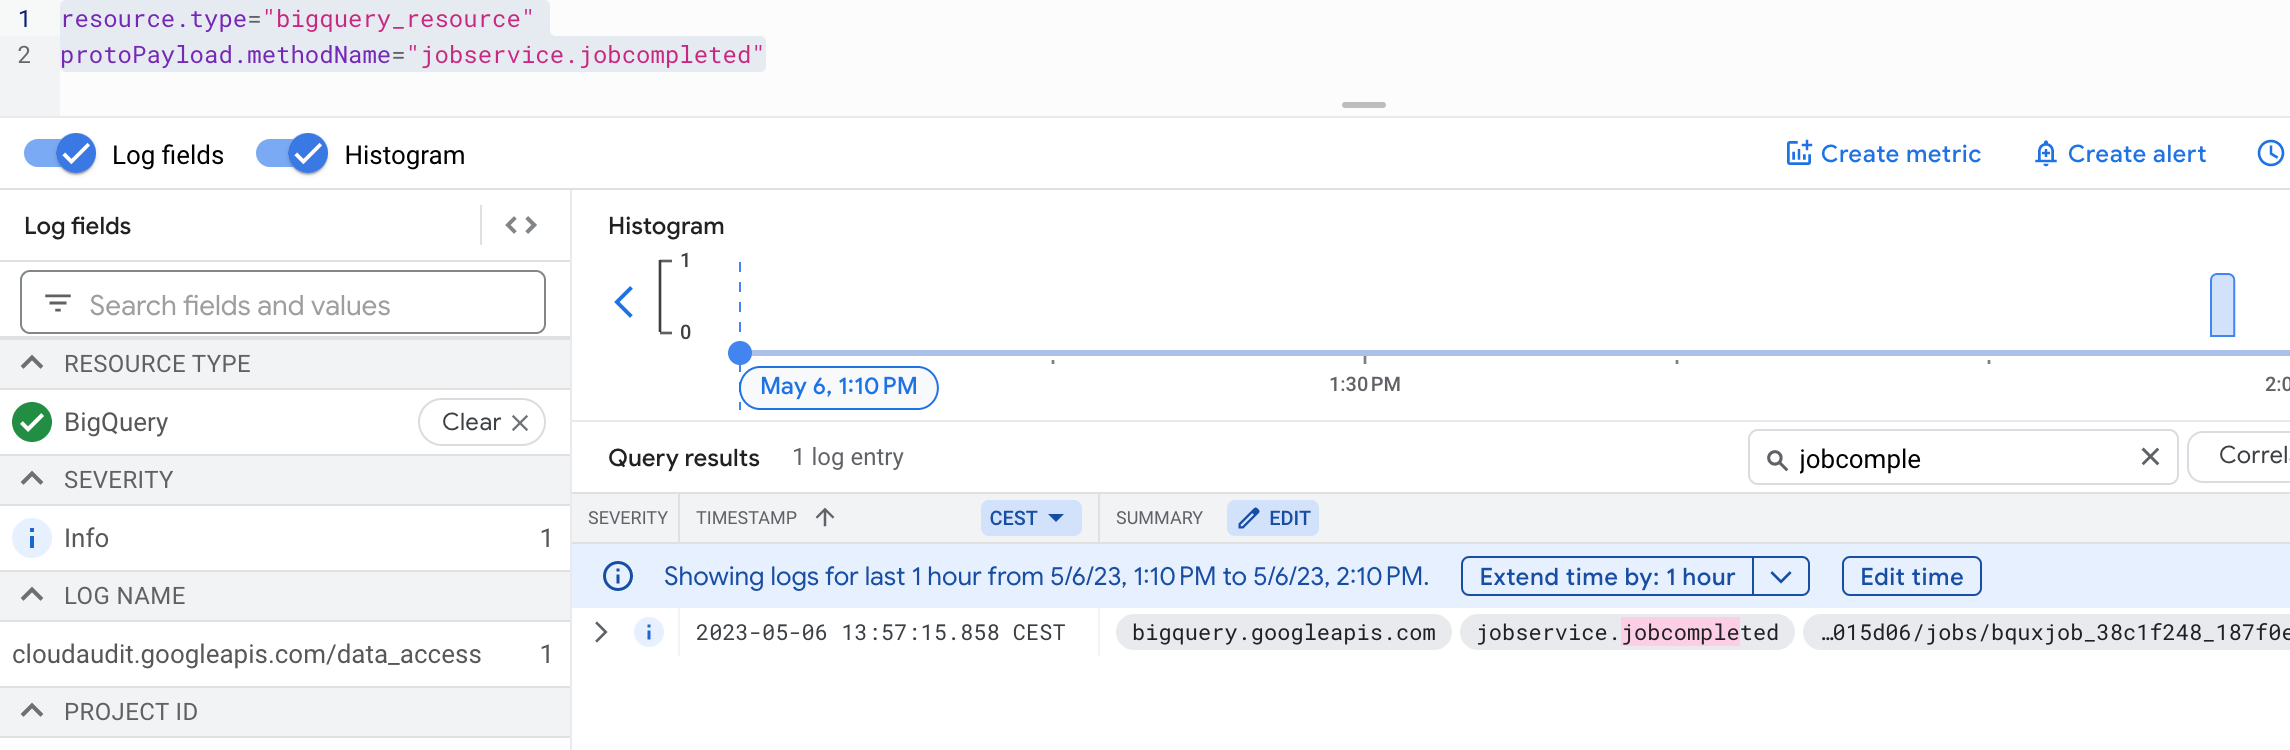

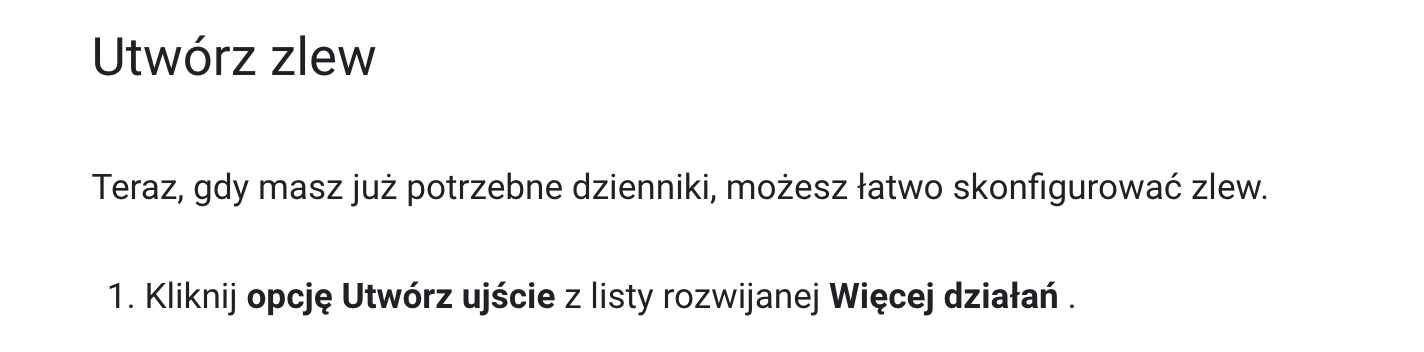

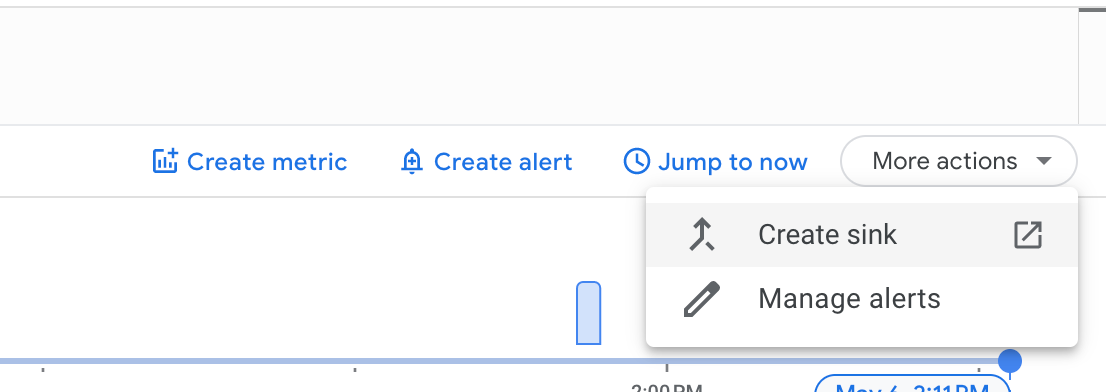

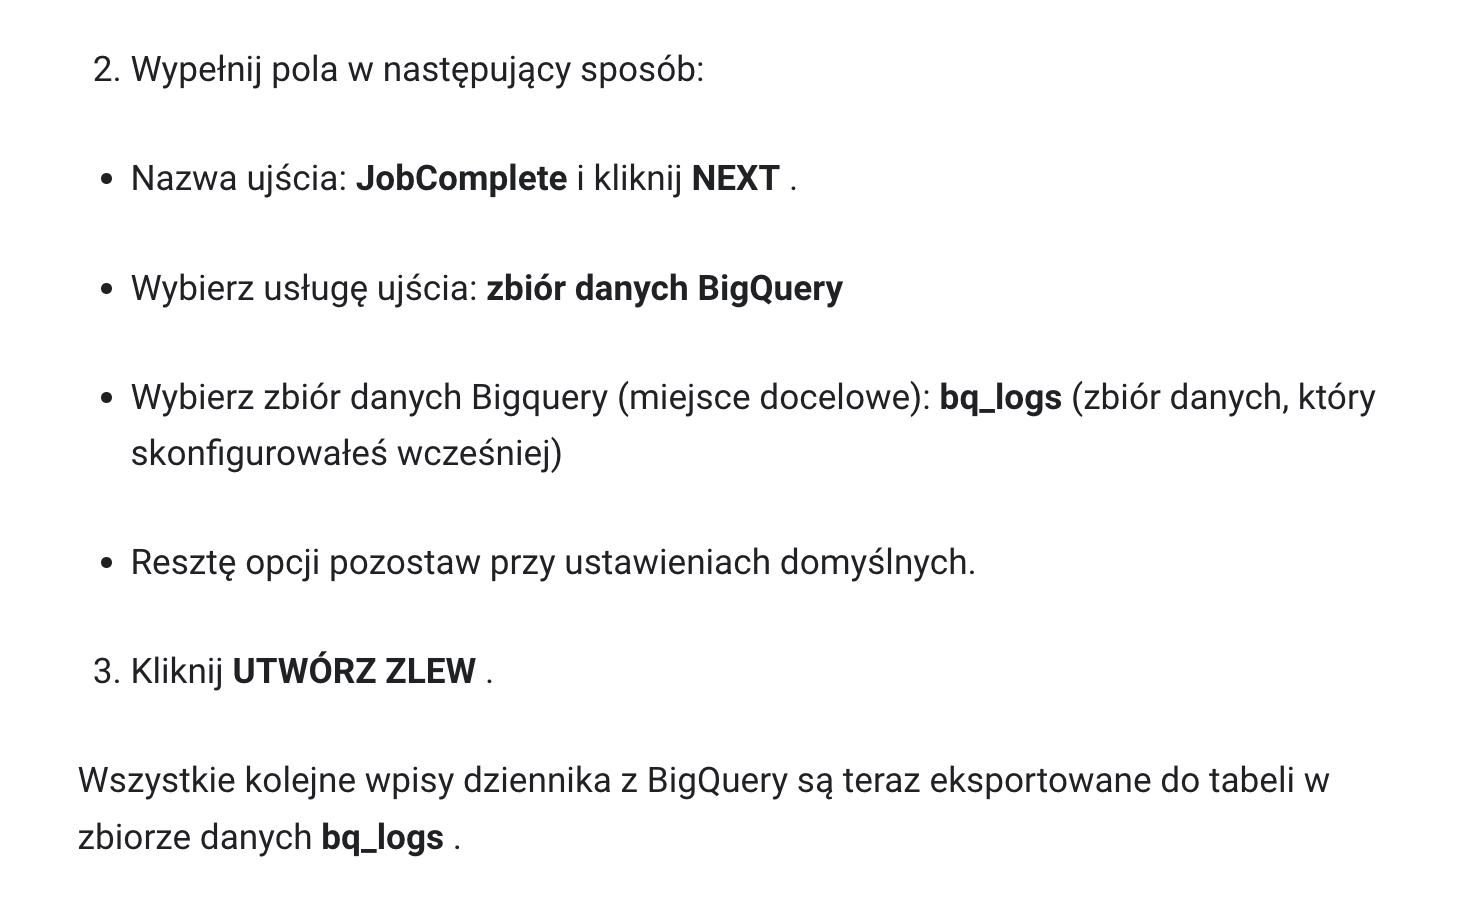

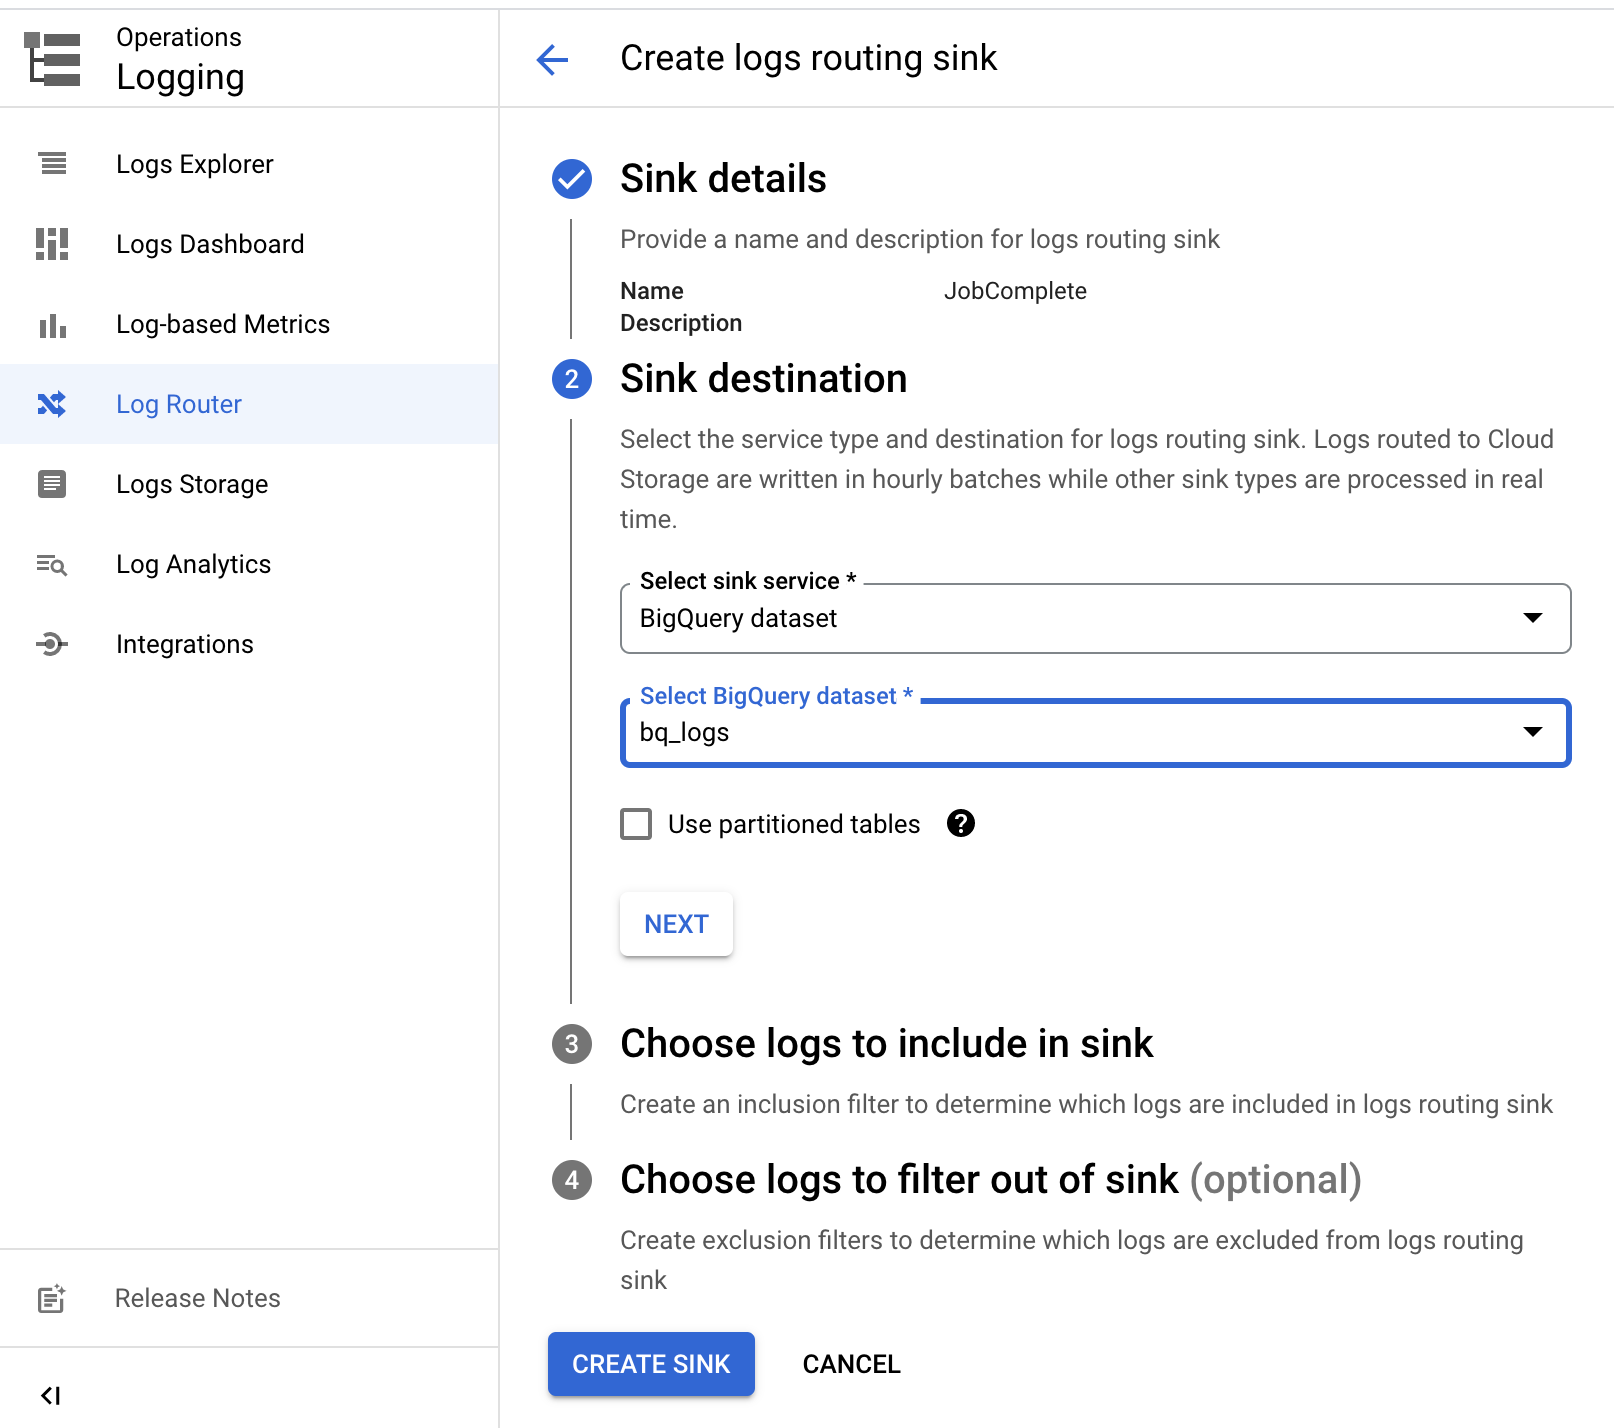

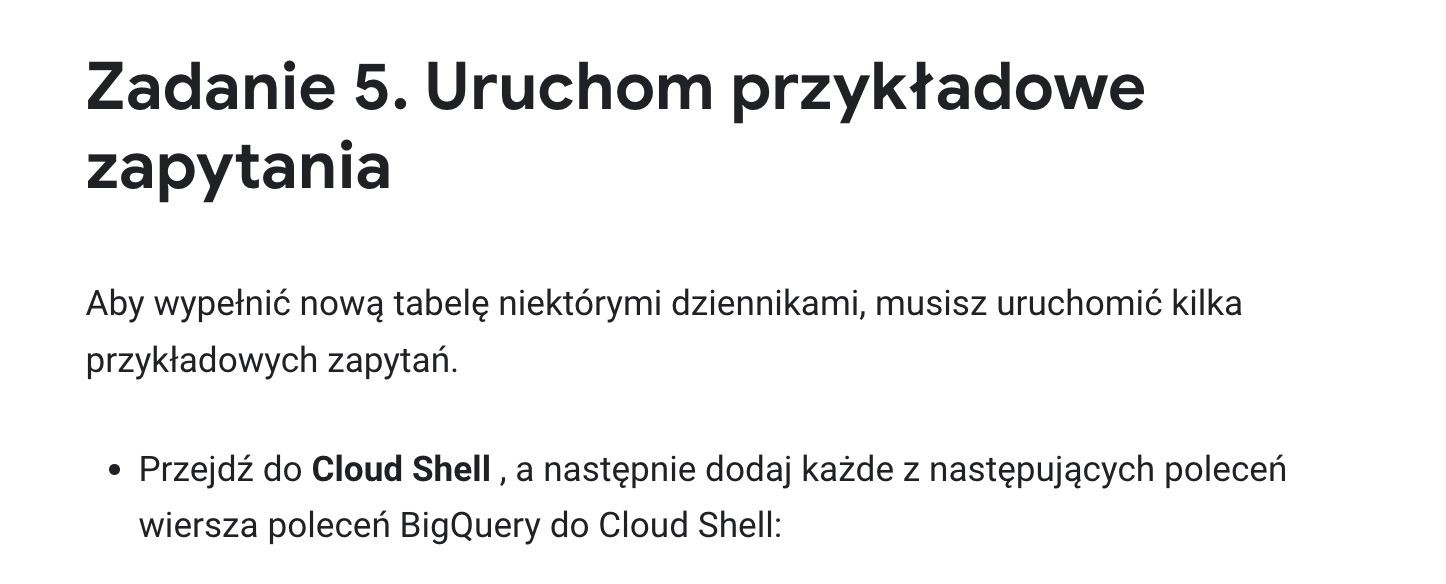

In [ ]:
bq query --location=us --use_legacy_sql=false --use_cache=false \
'SELECT fullName, AVG(CL.numberOfYears) avgyears
 FROM `qwiklabs-resources.qlbqsamples.persons_living`, UNNEST(citiesLived) as CL
 GROUP BY fullname'

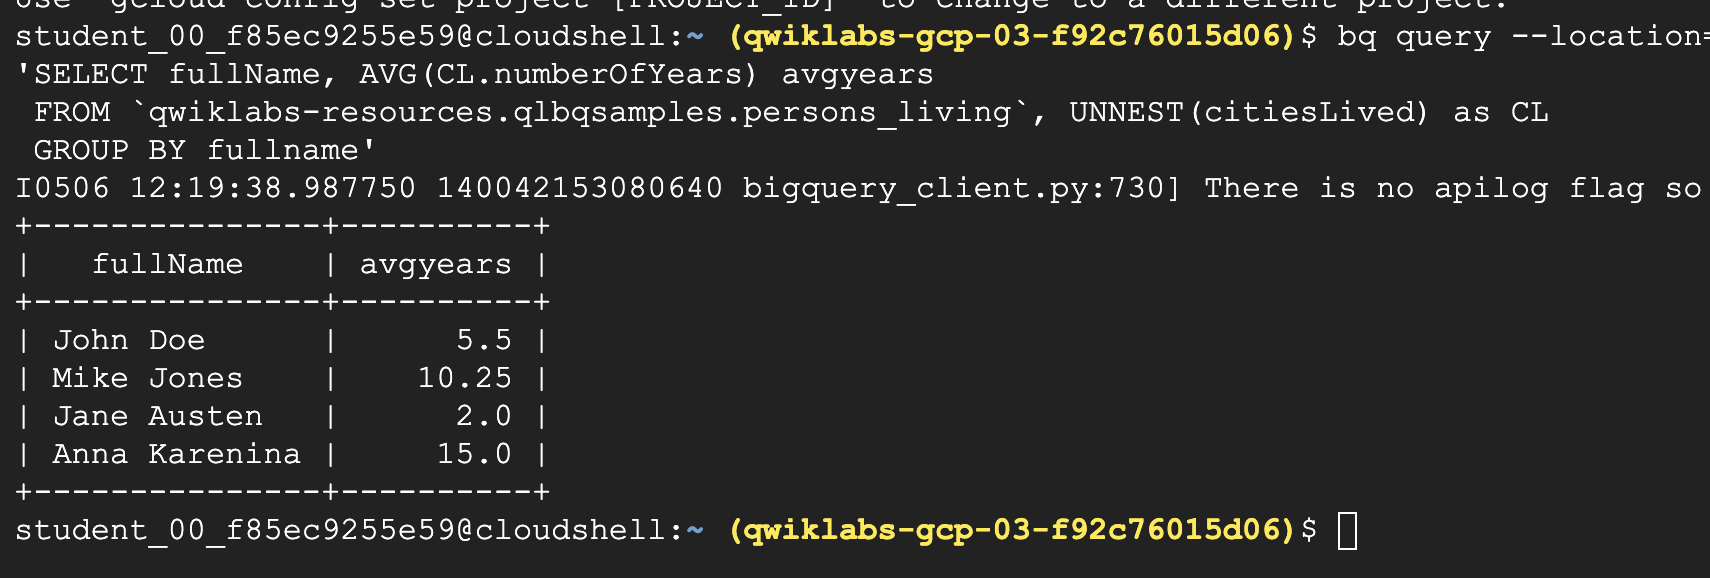

In [ ]:
bq query --location=us --use_legacy_sql=false --use_cache=false \
'select month, avg(mean_temp) as avgtemp from `qwiklabs-resources.qlweather_geo.gsod`
 where station_number = 947680
 and year = 2010
 group by month
 order by month'

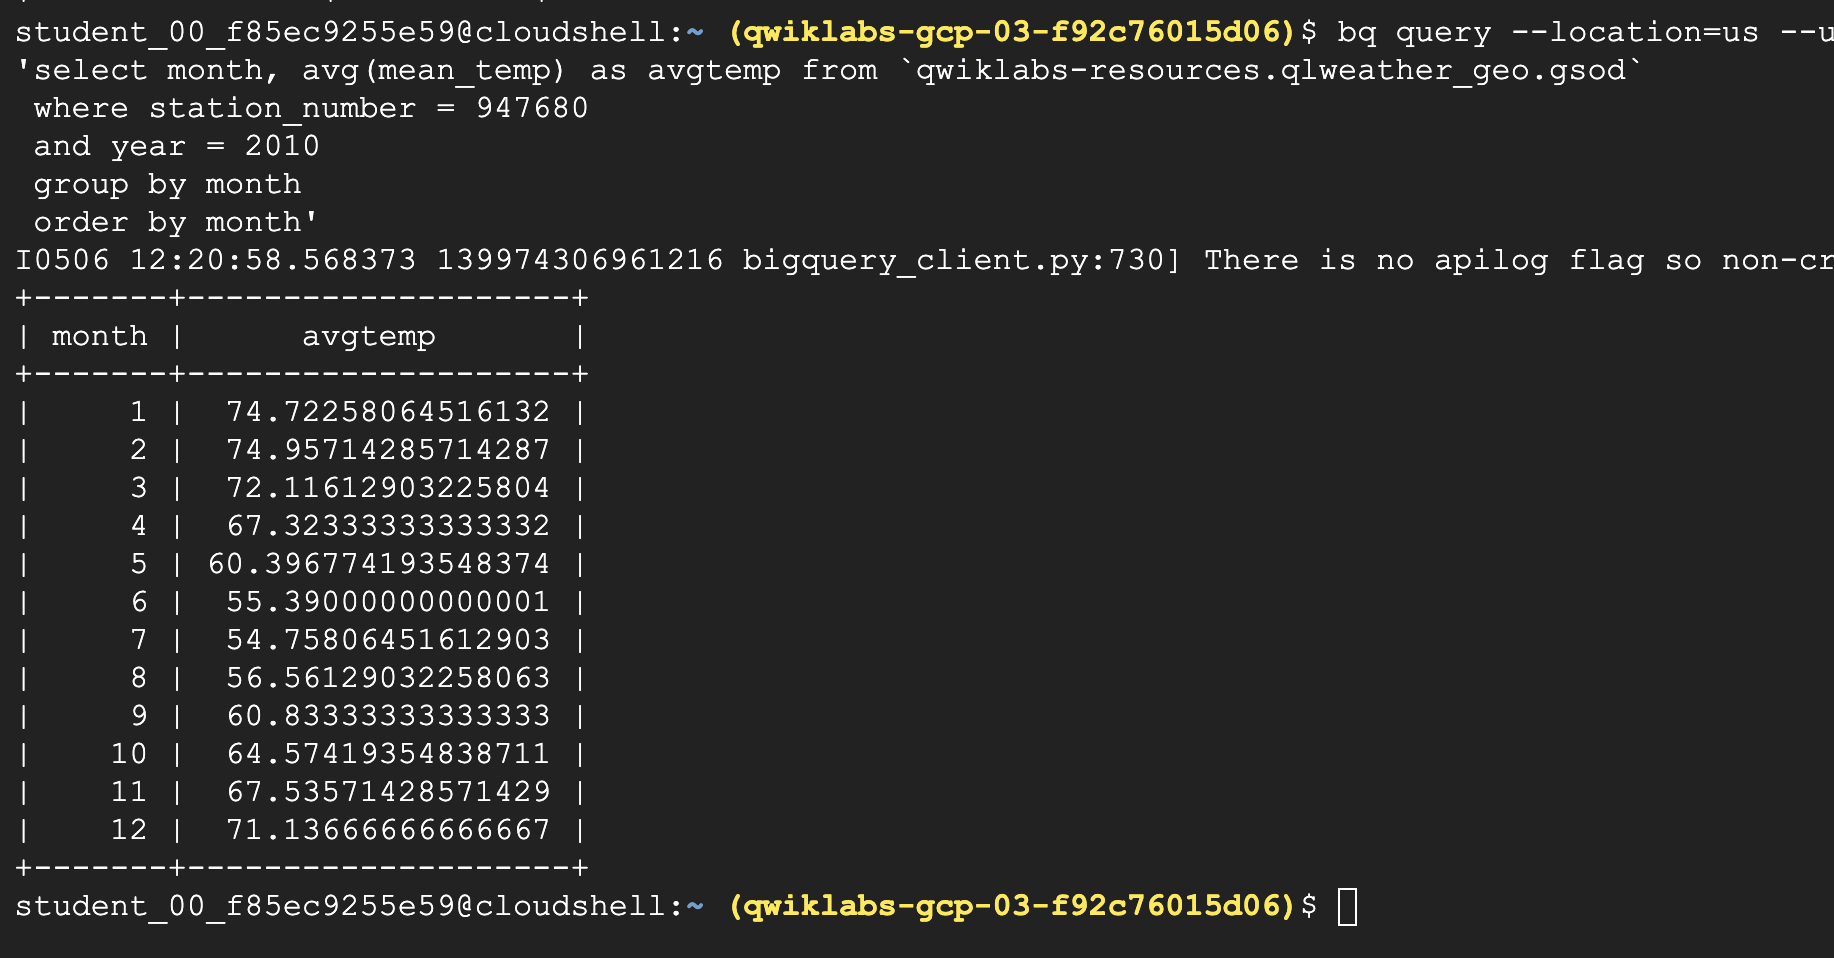

In [ ]:
bq query --location=us --use_legacy_sql=false --use_cache=false \
'select CONCAT(departure_airport, "-", arrival_airport) as route, count(*) as numberflights
 from `bigquery-samples.airline_ontime_data.airline_id_codes` ac,
 `qwiklabs-resources.qlairline_ontime_data.flights` fl
 where ac.code = fl.airline_code
 and regexp_contains(ac.airline ,  r"Alaska")
 group by 1
 order by 2 desc
 LIMIT 10'

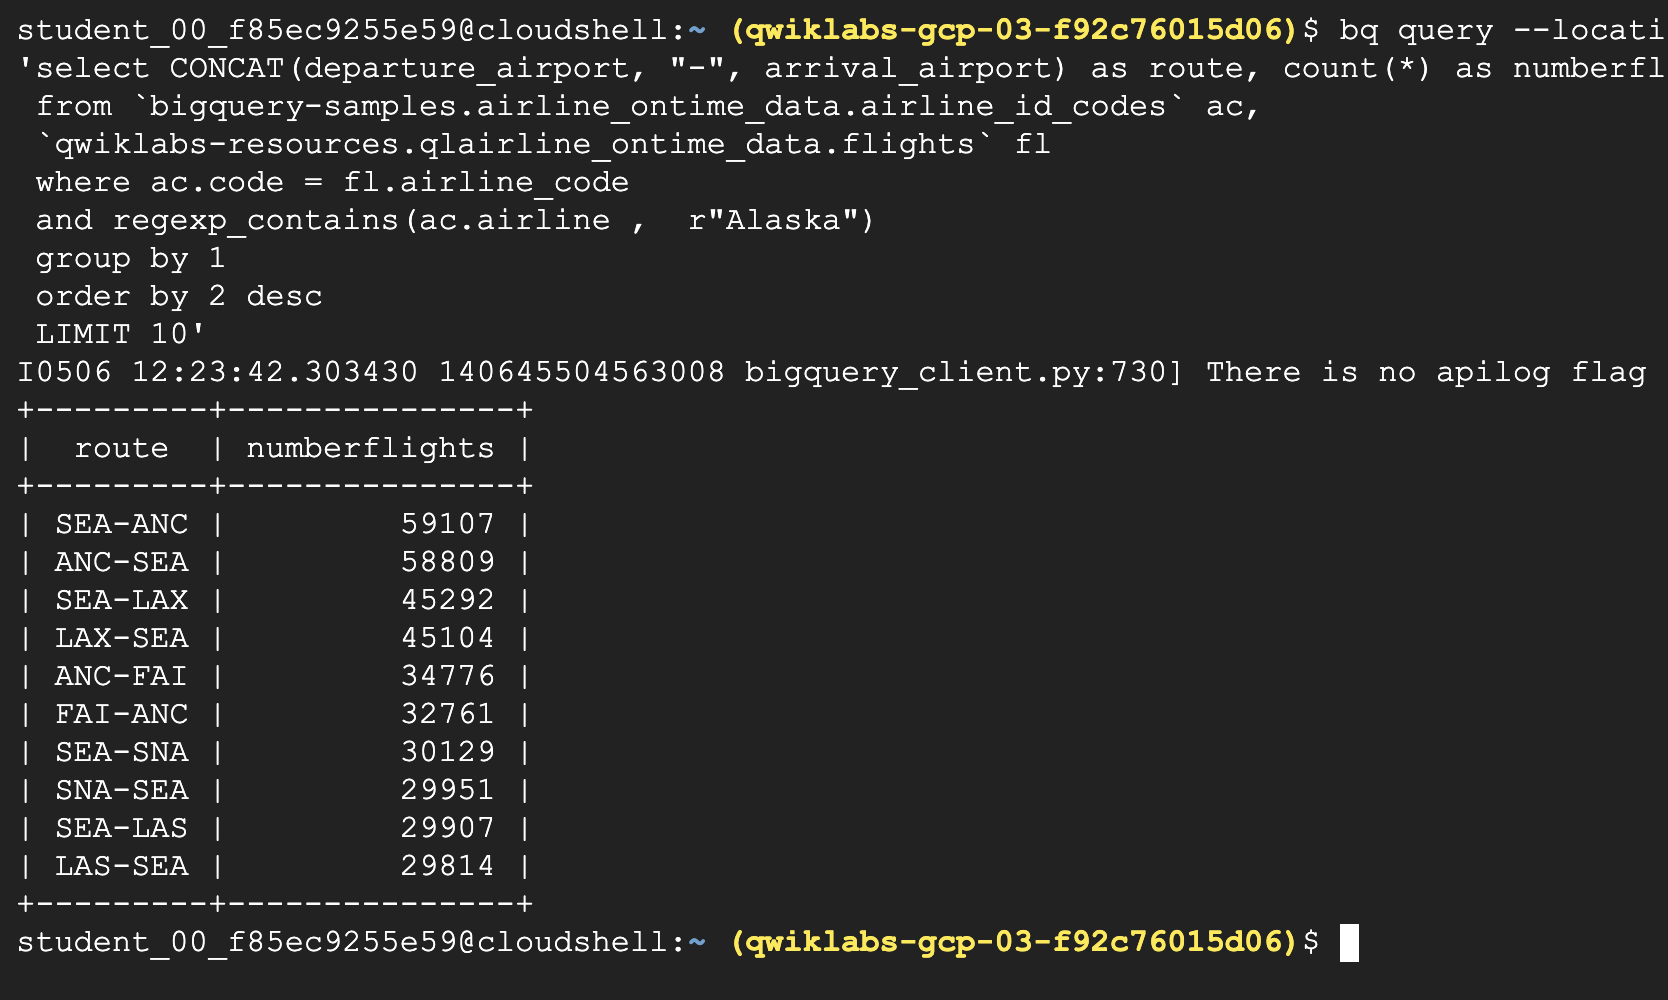

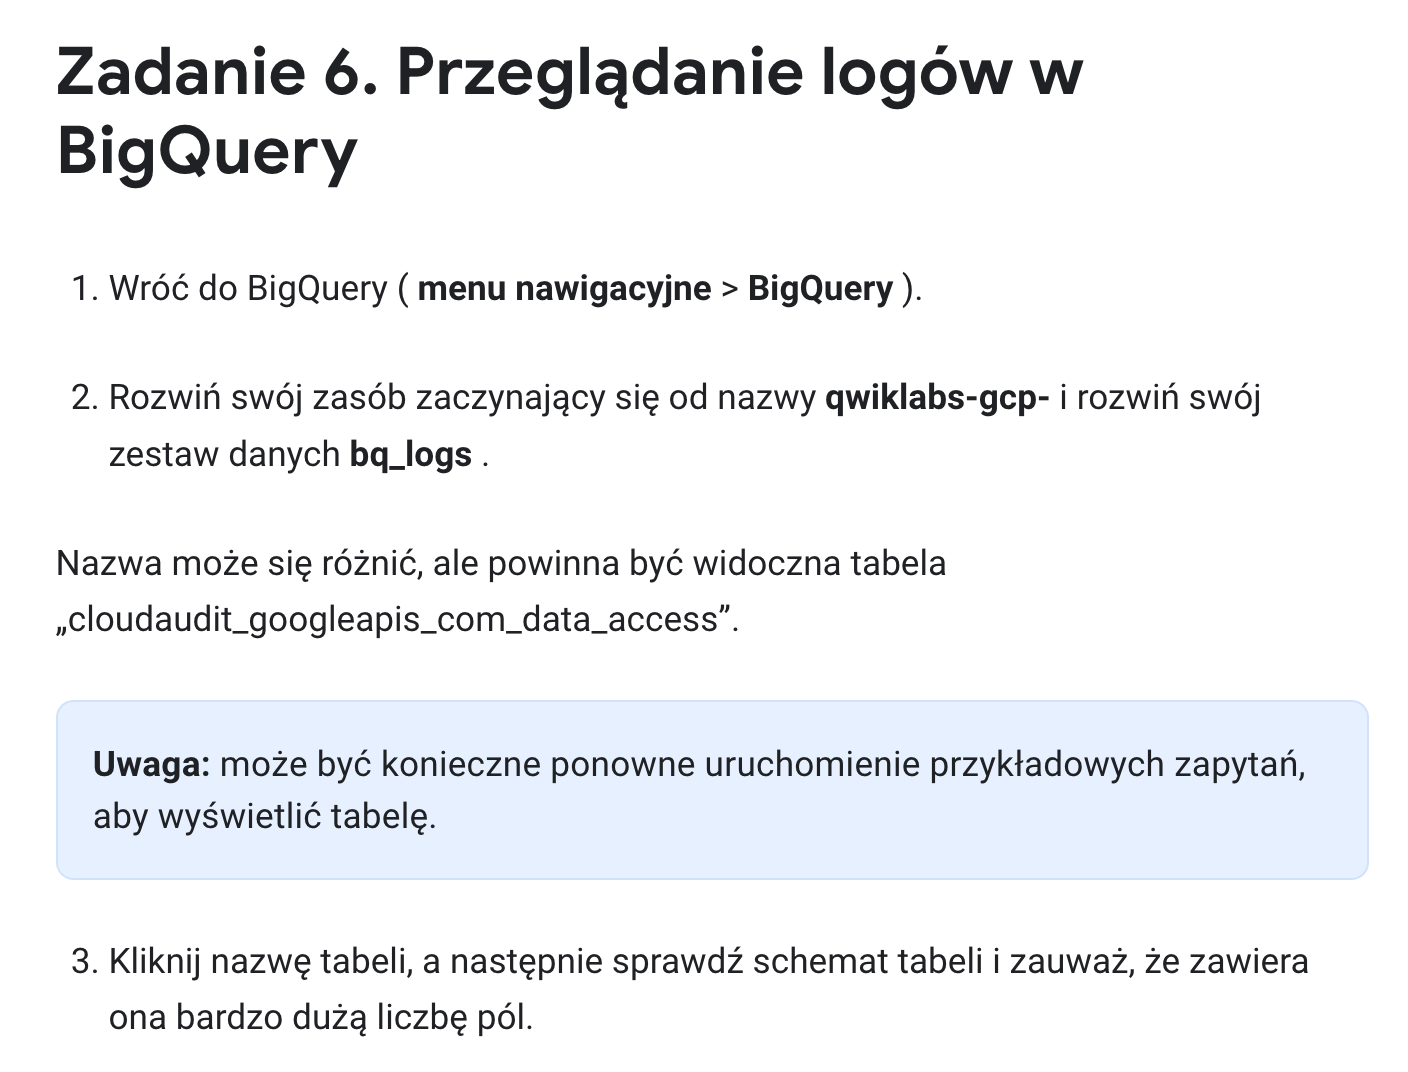

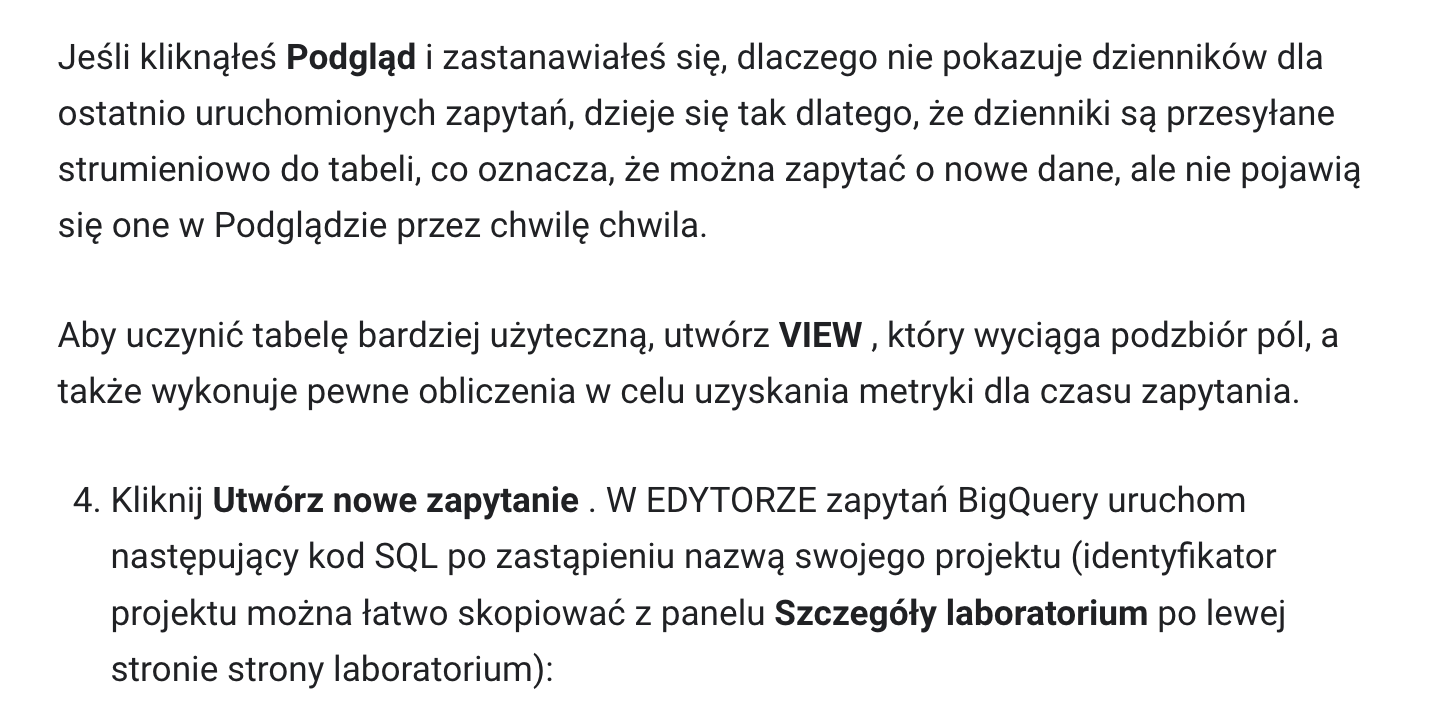

In [ ]:
-- %%bigquery

CREATE OR REPLACE VIEW
  bq_logs.v_querylogs AS
SELECT
  resource.labels.project_id,
  protopayload_auditlog.authenticationInfo.principalEmail,
  protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobConfiguration.query.query,
  protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobConfiguration.query.statementType,
  protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatus.error.message,
  protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatistics.startTime,
  protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatistics.endTime,
  TIMESTAMP_DIFF(protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatistics.endTime,           protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatistics.startTime, MILLISECOND)/1000 AS run_seconds,
  protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatistics.totalProcessedBytes,
  protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatistics.totalSlotMs,
  ARRAY(SELECT as STRUCT datasetid, tableId FROM UNNEST(protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatistics.referencedTables)) as tables_ref,
  protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatistics.totalTablesProcessed,
  protopayload_auditlog.servicedata_v1_bigquery.jobCompletedEvent.job.jobStatistics.queryOutputRowCount,
  severity
FROM
  `qwiklabs-gcp-03-f92c76015d06.bq_logs.cloudaudit_googleapis_com_data_access_*`
ORDER BY
  startTime

In [ ]:
%%bigquery

SELECT * FROM `qwiklabs-gcp-03-f92c76015d06.bq_logs.v_querylogs` LIMIT 1000

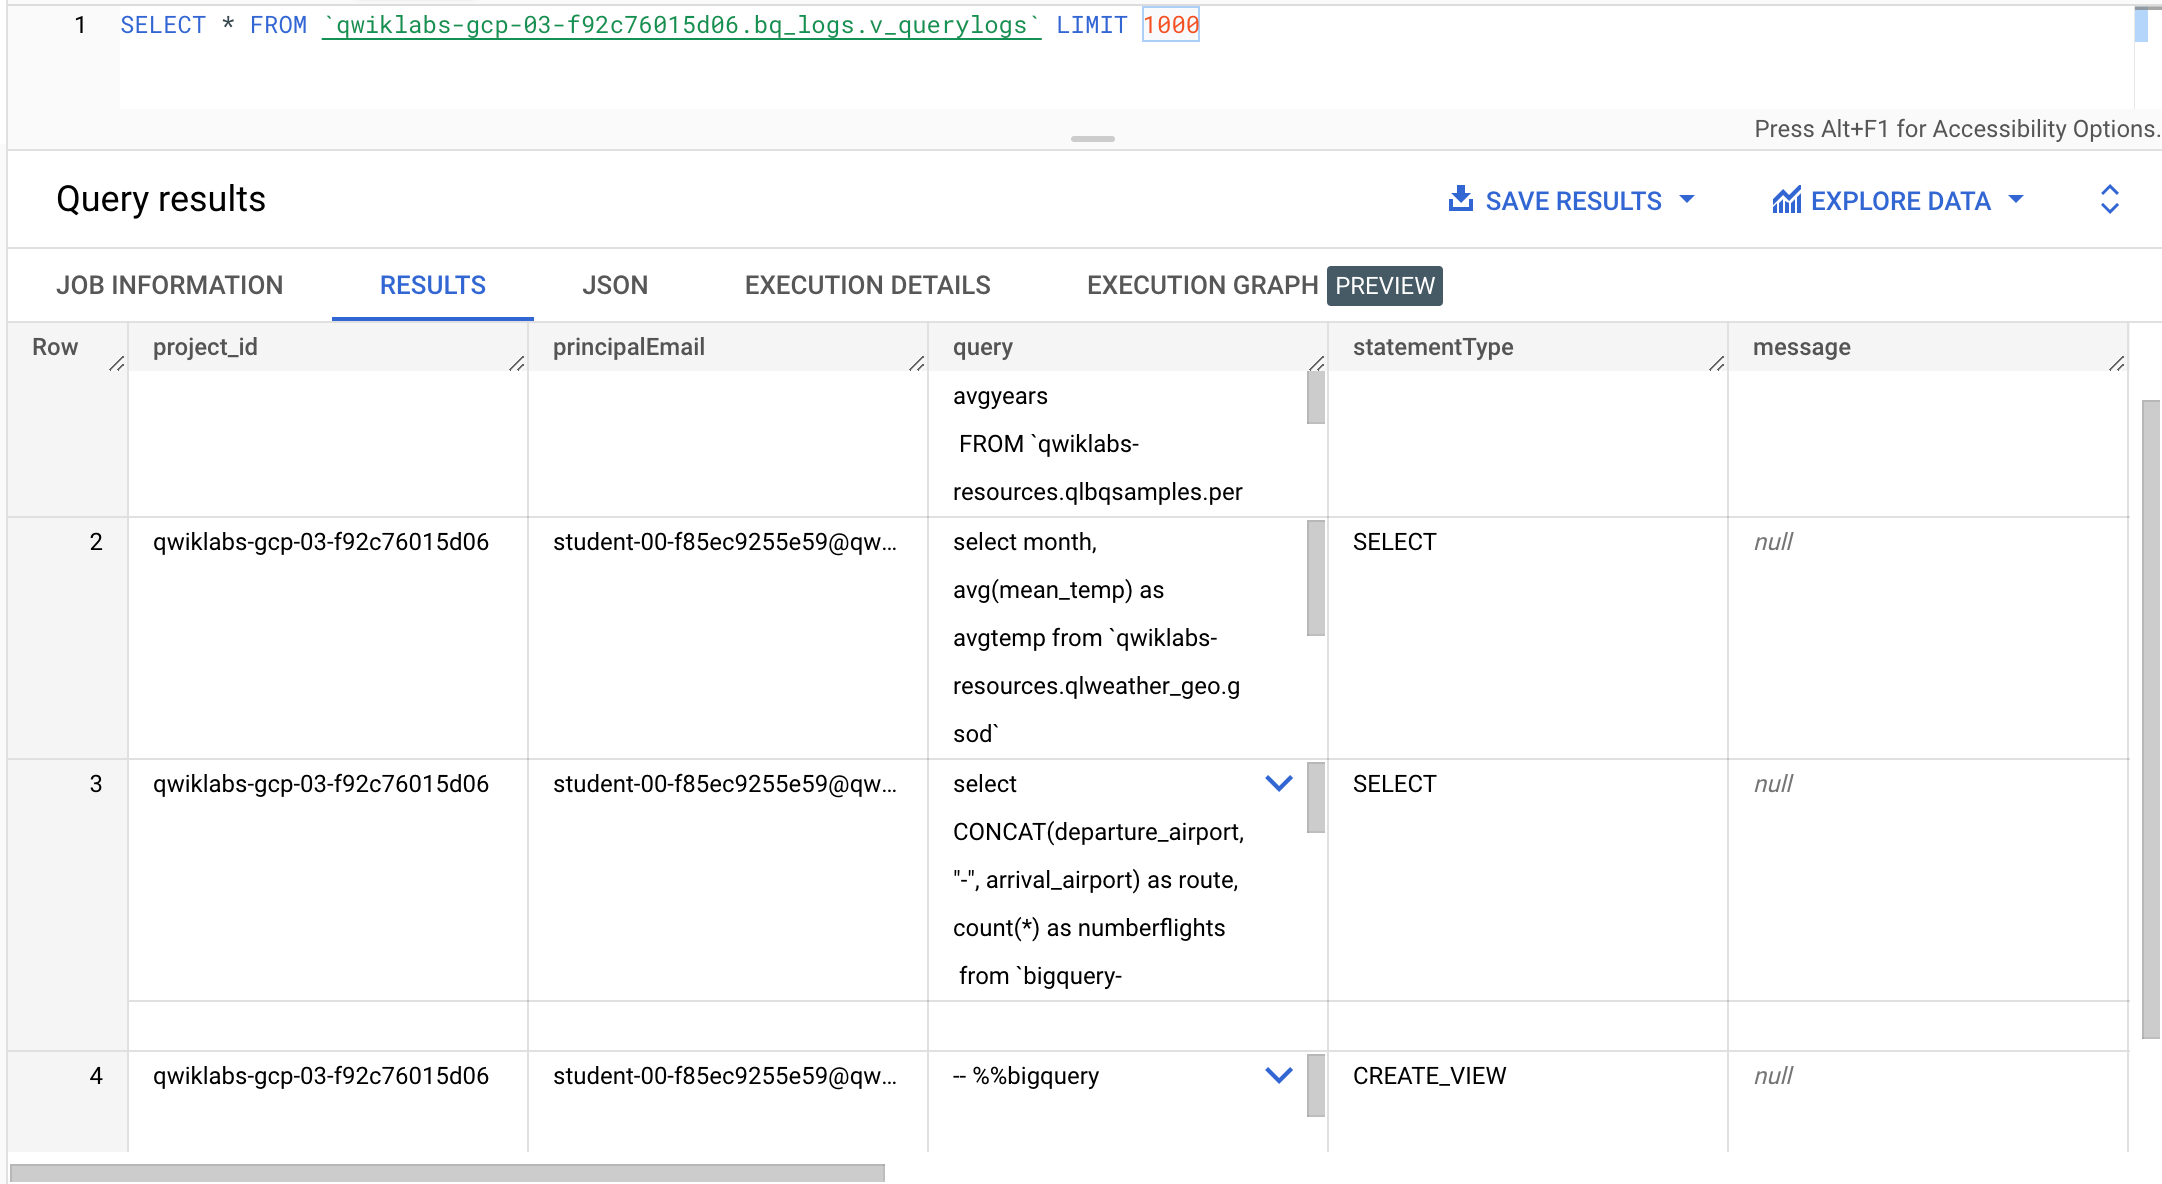